In [5]:
import pandas as pd

In [7]:
file_path = '../data/creditcard.csv'

In [9]:
df = pd.read_csv(file_path)

In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [17]:
print("\n\n--- Fraud vs. Non-Fraud Transactions ---")
# Check the distribution of the 'Class' column (our target variable).
# 0 = Non-Fraud, 1 = Fraud
# This will show us how imbalanced the dataset is.
print(df['Class'].value_counts())



--- Fraud vs. Non-Fraud Transactions ---
Class
0    284315
1       492
Name: count, dtype: int64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
sns.set_style('whitegrid')


--- Class Distribution ---


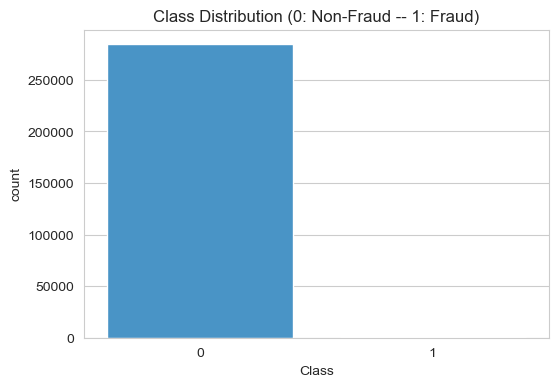

In [21]:
# --- Plot 1: Show the class imbalance ---
print("--- Class Distribution ---")
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette=['#3498db', '#e74c3c'], hue='Class', legend=False)
plt.title('Class Distribution (0: Non-Fraud -- 1: Fraud)')
plt.show()

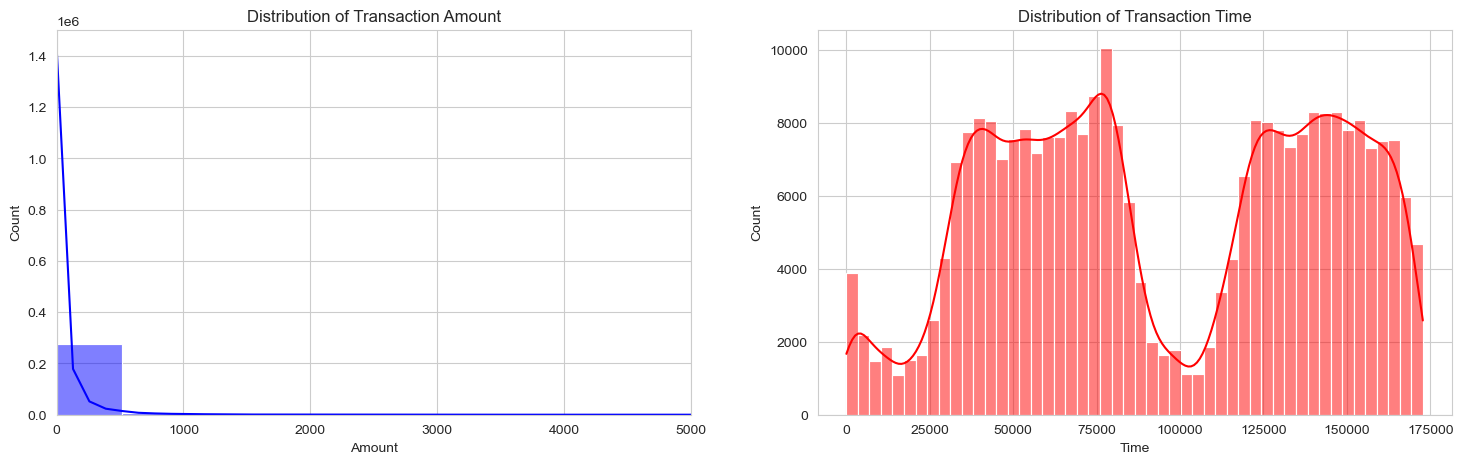

In [25]:
# --- Plot 2: Distribution of Transaction Amount and Time ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

# Plot for Transaction Amount
sns.histplot(df['Amount'], bins=50, ax=ax1, color='b', kde=True)
ax1.set_title('Distribution of Transaction Amount')
ax1.set_xlim(0, 5000) # Limiting x-axis for better readability as there are outliers

# Plot for Transaction Time
sns.histplot(df['Time'], bins=50, ax=ax2, color='r', kde=True)
ax2.set_title('Distribution of Transaction Time')

plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Create a copy of the dataframe to avoid changing the original
df_scaled = df.copy()

# Scale the 'Amount' and 'Time' columns
df_scaled['Amount'] = scaler.fit_transform(df_scaled['Amount'].values.reshape(-1, 1))
df_scaled['Time'] = scaler.fit_transform(df_scaled['Time'].values.reshape(-1, 1))

# Display the first 5 rows of the scaled dataframe to see the changes
print("--- Scaled DataFrame Head ---")
df_scaled.head()

--- Scaled DataFrame Head ---


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [29]:
from sklearn.model_selection import train_test_split

# 'X' contains all our feature columns (everything except 'Class')
X = df_scaled.drop('Class', axis=1)

# 'y' contains our target column ('Class')
y = df_scaled['Class']

# Split the data into training and testing sets
# We'll use 80% for training and 20% for testing
# 'stratify=y' ensures the proportion of fraud cases is the same in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
model = LogisticRegression()

# Train the model using our training data
print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete!")

Training the model...
Model training complete!


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# --- Print the evaluation metrics ---

# Accuracy Score
print("--- Accuracy Score ---")
print(f"{accuracy_score(y_test, y_pred):.4f}")

# Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

--- Accuracy Score ---
0.9992

--- Confusion Matrix ---
[[56851    13]
 [   35    63]]

--- Classification Report ---
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [35]:
from imblearn.over_sampling import SMOTE

print("--- Original Training Set Distribution ---")
print(y_train.value_counts())

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\n--- Resampled Training Set Distribution ---")
print(y_train_resampled.value_counts())

--- Original Training Set Distribution ---
Class
0    227451
1       394
Name: count, dtype: int64

--- Resampled Training Set Distribution ---
Class
0    227451
1    227451
Name: count, dtype: int64


In [37]:
# Create a new Logistic Regression model
model_resampled = LogisticRegression()

# Train the new model on the balanced (resampled) data
print("Training the new model on resampled data...")
model_resampled.fit(X_train_resampled, y_train_resampled)
print("Model training complete!")

Training the new model on resampled data...
Model training complete!


In [39]:
# Make predictions on the original test set
y_pred_resampled = model_resampled.predict(X_test)

# --- Print the evaluation metrics for the new model ---

# Accuracy Score
print("--- Accuracy Score (Resampled Model) ---")
print(f"{accuracy_score(y_test, y_pred_resampled):.4f}")

# Confusion Matrix
print("\n--- Confusion Matrix (Resampled Model) ---")
cm_resampled = confusion_matrix(y_test, y_pred_resampled)
print(cm_resampled)

# Classification Report
print("\n--- Classification Report (Resampled Model) ---")
print(classification_report(y_test, y_pred_resampled, target_names=['Non-Fraud', 'Fraud']))

--- Accuracy Score (Resampled Model) ---
0.9743

--- Confusion Matrix (Resampled Model) ---
[[55406  1458]
 [    8    90]]

--- Classification Report (Resampled Model) ---
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.97      0.99     56864
       Fraud       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [41]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest model
# n_estimators=100 means it will build 100 decision trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the balanced (resampled) data
print("Training the Random Forest model...")
rf_model.fit(X_train_resampled, y_train_resampled)
print("Model training complete!")

# --- Evaluate the new model ---
print("\n--- Evaluating Random Forest Model ---")
y_pred_rf = rf_model.predict(X_test)

# Classification Report
print("\n--- Classification Report (Random Forest) ---")
print(classification_report(y_test, y_pred_rf, target_names=['Non-Fraud', 'Fraud']))

Training the Random Forest model...
Model training complete!

--- Evaluating Random Forest Model ---

--- Classification Report (Random Forest) ---
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [43]:
import joblib

# Define the file path where you want to save the model
# We'll create a new 'models' directory for this
import os
if not os.path.exists('../models'):
    os.makedirs('../models')

model_filename = '../models/random_forest_fraud_detector.joblib'

# Save the trained Random Forest model to the file
joblib.dump(rf_model, model_filename)

print(f"Model saved successfully to: {model_filename}")

Model saved successfully to: ../models/random_forest_fraud_detector.joblib


In [45]:
import joblib
from sklearn.preprocessing import StandardScaler
# This assumes your scaled DataFrame from earlier is named df_scaled
# We create and fit a new scaler on the Time and Amount columns from your full dataset
scaler_to_save = StandardScaler()
scaler_to_save.fit(df_scaled[['Time', 'Amount']])

# Save the fitted scaler to a file
joblib.dump(scaler_to_save, '../models/scaler.joblib')

print("Scaler saved successfully to: ../models/scaler.joblib")

Scaler saved successfully to: ../models/scaler.joblib
